# Hauptkomponentenanalyse - Principal Component Analysis (PCA)

## Datensatz einlesen

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = 50

df = pd.read_csv("../Data/iris.data", header=None, sep=",", names=["s_length", "s_width", "p_length", "p_width","class"])
X = df.loc[:, df.columns != 'class']
y = df.loc[:, df.columns == 'class']

In [4]:
X.shape

(150, 4)

In [5]:
X[0:10]

,s_length,s_width,p_length,p_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


# 1 - Berechnung der Kovarianzmatrix

In [6]:
X_cov = X.copy()
X_numpy = X_cov.to_numpy().T
X_numpy -= X_numpy.mean(axis=1)[(slice(None), np.newaxis)]
N = X_numpy.shape[1]
n = float(N - 1)
cov_mat = np.dot(X_numpy, X_numpy.T) / n
print(cov_mat)

[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


# 2 - Eigendekomposition - Berechnung Eigenvektoren and Eigenwerte

## 2.1. Charakteristisches Polynom

In [7]:
cp = np.poly(np.matrix(cov_mat))

## 2.2. Eigenwerte (Nullstellen)

In [18]:
eig_vals = np.roots(cp)

## 2.3. Eigenvektoren mit QR Zerlegung

In [20]:
eig_vecs = []
mi = []
for i in eig_vals:
    mi = np.subtract(cov_mat, (i * np.identity(len(eig_vals))))
    qr = np.linalg.qr(mi, mode='complete')
    q = qr[0]
    r = qr[1]

    rang = 0
    for x in range(len(r)):
        sum_of_x = 0
        for y1 in r[x]:
            sum_of_x += y1.round(3)
        if sum_of_x == 0:
            rang = x-1
    spalte = len(r) - rang
    spalte = len(r)+1 - spalte
    erg = []
    for x in q:
        erg.append(x[spalte])
    eig_vecs.append(erg)
eig_vecs = np.array(eig_vecs)

# 3 - Auswahl der Hauptkomponenten (Principal Components)

## Sortierung der Eigenpaare (Eigenpairs)

In [10]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Ok Ok!')

Ok Ok!


In [22]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = []

for i in range(len(eig_vals)):
    eig_pairs.append([eig_vals[i], eig_vecs[i]])

eig_pairs.sort(reverse = True)

## Explained Variance

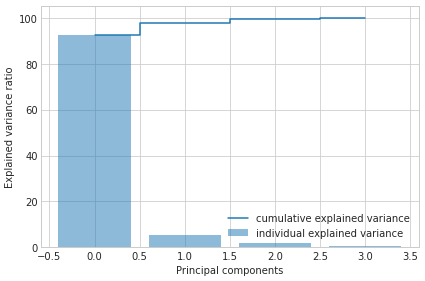

In [12]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

## Projektionsmatrix W

In [13]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

[[ 0.36158968 -0.65653988]
 [-0.08226889 -0.72971237]
 [ 0.85657211  0.1757674 ]
 [ 0.35884393  0.07470647]]
